# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
# split train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create ensembler
base_estimator = DecisionTreeClassifier()
# Use 'estimator' instead of 'base_estimator'
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

In [ ]:
# train the model
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
# predict the model
y_pred = bagging_classifier.predict(X_test)

In [ ]:
# check the accuaries
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
# load the datasets
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a decisionTreeRegressor
base_estimator = DecisionTreeRegressor()

In [ ]:
# create a ensembler
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

In [ ]:
# train the model
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [ ]:
# predict the model
y_pred = bagging_regressor.predict(X_test)

In [ ]:
# check the mse
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2824242776841025


# 23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# load the datasets
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [ ]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf

RandomForestClassifier(random_state=42)

In [ ]:
# train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predict the model
y_pred = clf.predict(X_test)

In [ ]:
# check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9649122807017544


In [ ]:
# feature importance
importances = clf.feature_importances_

In [ ]:
# print the feature importance
feature_importance_df = pd.DataFrame({'Feature': cancer.feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# print the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature importance scores (sorted):")
print(feature_importance_df)

Feature importance scores (sorted):
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  

# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# load the datasets
housing = fetch_california_housing()
X = housing.data
y = housing.target


In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train data for decsion tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
r2_dt = r2_score(y_test, dt_y_pred)
mse_dt = mean_squared_error(y_test, dt_y_pred)


In [ ]:
# train the data for random forest tree
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# check the performance of both the tree
rf_y_pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

In [ ]:
# compare the performance of both the trees
print(f"Decision Tree - MSE: {mse_dt}, R2 Score: {r2_dt}")
print(f"Random Forest - MSE: {mse}, R2 Score: {r2}")


Decision Tree - MSE: 0.0, R2 Score: 1.0
Random Forest - MSE: 0.0, R2 Score: 1.0


# 25.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train the model add oob
clf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
# predict the model
y_pred = clf.predict(X_test)

In [ ]:
# print the OOB values
oob_score = clf.oob_score_
print(f"OOB Score: {oob_score}")

OOB Score: 0.9166666666666666


# 26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# load the dataset
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
# split train and test the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train model with SVM
base_estimator = SVC()


In [ ]:
# fit the x_train and y_train
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), random_state=42)

In [ ]:
# predict the values
y_pred = bagging_classifier.predict(X_test)

In [ ]:
# check the preformance of the dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# 27.Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# list of tree
tree_counts = [10, 50, 100, 200]

In [ ]:
# using loop as estimors
for tree_count in tree_counts:
    rf_classifier = RandomForestClassifier(n_estimators=tree_count, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Number of trees: {tree_count}, Accuracy: {accuracy}")

Number of trees: 10, Accuracy: 1.0
Number of trees: 50, Accuracy: 1.0
Number of trees: 100, Accuracy: 1.0
Number of trees: 200, Accuracy: 1.0


# 28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# load the datasets
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# use logistic regression as base estimator
base_estimator = LogisticRegression()

In [ ]:
# train a model using base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

BaggingClassifier(estimator=LogisticRegression(), random_state=42)

In [ ]:
# predict the values
y_pred = bagging_classifier.predict(X_test)

In [ ]:
# check the accuracy
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")
#

AUC Score: 0.9580740255486406


# 29.Train a Random Forest Regressor and analyze feature importance scores.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# load the dataset and feature_name
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

In [ ]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# split train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# predict the values
y_pred = rf_regressor.predict(X_test)

In [ ]:
# importance of feature_name
importances = rf_regressor.feature_importances_

In [ ]:
# print the values of all feature_name
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
0,MedInc,0.524871
5,AveOccup,0.138443
6,Latitude,0.088936
7,Longitude,0.088629
1,HouseAge,0.054593
2,AveRooms,0.044272
4,Population,0.030650
3,AveBedrms,0.029606


# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train with bagging
bagging_classifier = BaggingClassifier(n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
# predict the values
y_pred_bagging = bagging_classifier.predict(X_test)

In [ ]:
# train the model with random forest regression
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# predict the values
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# campare the accuries of both the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
# print the values of both the model
print(f"Accuracy with Bagging: {accuracy_bagging}")
print(f"Accuracy with Random Forest: {accuracy_rf}")

Accuracy with Bagging: 1.0
Accuracy with Random Forest: 1.0


# 31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# split train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# use parameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# train the model
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

# 32.Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# load the datasets
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
# train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
estimators_range = [10, 50, 100, 200]
mse_scores = []
r2_scores = []

In [ ]:
for n_estimators in estimators_range:
    bagging_regressor = BaggingRegressor(n_estimators=n_estimators, random_state=42)
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Number of estimators: {n_estimators}, MSE: {mse}, R2 Score: {r2}")

Number of estimators: 10, MSE: 0.2824242776841025, R2 Score: 0.7844762342339637
Number of estimators: 50, MSE: 0.2572988359842641, R2 Score: 0.8036499747356253
Number of estimators: 100, MSE: 0.25592438609899626, R2 Score: 0.8046988456668309
Number of estimators: 200, MSE: 0.25409321906314747, R2 Score: 0.806096246834142


# 33. Train a Random Forest Classifier and analyze misclassified samples.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import matplotlib.pyplot as plt
import  seaborn as sns

In [ ]:
# Load sample dataset (Iris)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [ ]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predit the model
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

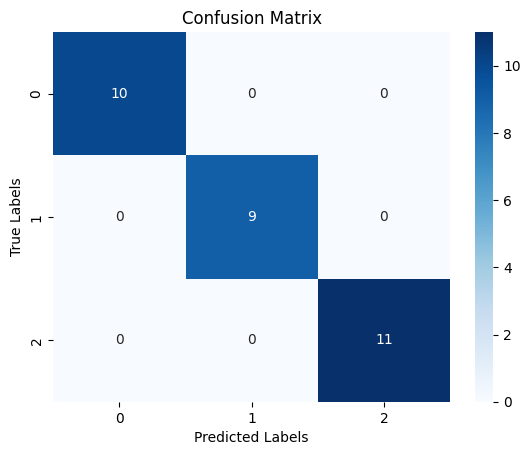

In [ ]:
# import a map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 34.Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train with decsiontreeclassfiier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predictt the model
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# train with random forest tree
# Changed base_estimator to estimator
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [ ]:
# predict the model
y_pred_bagging = bagging_classifier.predict(X_test)

In [ ]:
# campare both the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

In [ ]:
# print the values of both the model
print(f"Accuracy with Decision Tree: {accuracy_dt}")
print(f"Accuracy with Bagging: {accuracy_bagging}")

Accuracy with Decision Tree: 1.0
Accuracy with Bagging: 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# campare both the model with this two metrics
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Bagging Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<function matplotlib.pyplot.show(close=None, block=None)>

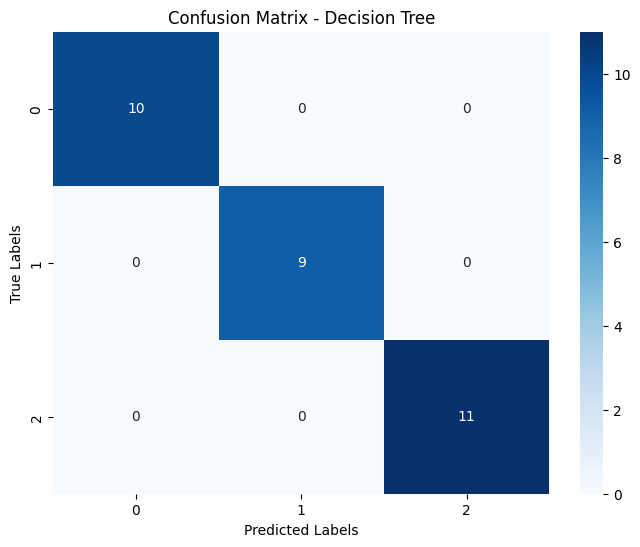

In [ ]:
# make a plot for decision tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

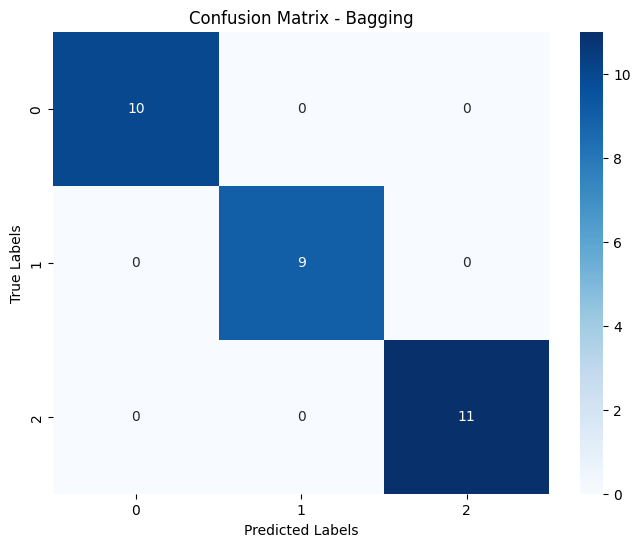

In [ ]:
# make a plot for random forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Bagging')
plt.show


# 35.Train a Random Forest Classifier and visualize the confusion matrix.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# split train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predict the model
y_pred = model.predict(X_test)

In [ ]:
# check the metric confusion
conf_matrix = confusion_matrix(y_test, y_pred)

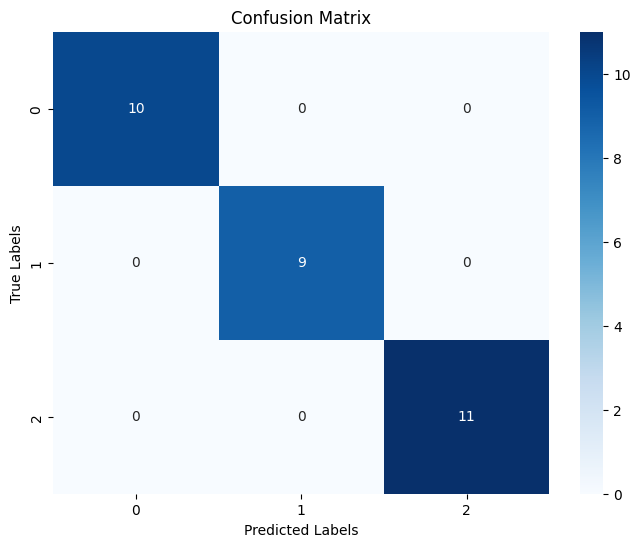

In [ ]:
# import the plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
Y= iris.target

In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# base learners
base_learner = [
    ('dt',DecisionTreeClassifier(random_state=42),
     'svc',SVC(random_state=42 , probability=True),)
]

In [ ]:
# meta learner
meta_learner = LogisticRegression()

In [ ]:
# base learners
base_learner = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True))
]

# meta learner
meta_learner = LogisticRegression()

# train the model
stacking_classifier = StackingClassifier(estimators=base_learner, final_estimator=meta_learner)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# train the decision tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# predict the values of decision tree
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# train svm model
svm_classifier = SVC(random_state=42, probability=True)
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# predict the svm model
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
# train logistic model
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# prdeict the model
y_pred_logistic = logistic_classifier.predict(X_test)

In [ ]:
# check the accuracy score of all the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_stacking = accuracy_score(y_test, y_pred)

In [ ]:
# print the value of all the model
print(f"Accuracy with Decision Tree: {accuracy_dt}")
print(f"Accuracy with SVM: {accuracy_svm}")
print(f"Accuracy with Logistic Regression: {accuracy_logistic}")
print(f"Accuracy with Stacking Classifier: {accuracy_stacking}")

Accuracy with Decision Tree: 1.0
Accuracy with SVM: 1.0
Accuracy with Logistic Regression: 1.0
Accuracy with Stacking Classifier: 1.0


# 37.Train a Random Forest Classifier and print the top 5 most important features

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
Y= iris.target
feature_name = iris.feature_names

In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns=feature_name)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predict the model
y_pred = rf_classifier.predict(X_test)

In [ ]:
importances = rf_classifier.feature_importances_

In [ ]:
for feature, importance in zip(feature_name, importances):
    print(f"{feature}: {importance}")

feature_importance_df = pd.DataFrame({'Feature': feature_name, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sepal length (cm): 0.10809762464246378
sepal width (cm): 0.030386812473242528
petal length (cm): 0.43999397414456937
petal width (cm): 0.4215215887397244


# 38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# load the datasets
iris = load_iris()
X = iris.data
Y = iris.target

In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# train the model

# Changed base_estimator to estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
# predict the values
y_pred = bagging_classifier.predict(X_test)

In [ ]:
# check all the mertics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# print all the values
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 1.0
Recall: 1.0
F1-score: 1.0


# 39.Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load the datasets
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
# train and test the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

In [ ]:
depths = list(range(1,21))
acc = []


In [ ]:
# train model using for loop
for depth in depths:
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(f"Depth: {depth}, Accuracy: {accuracy}")

Depth: 1, Accuracy: 1.0
Depth: 2, Accuracy: 1.0
Depth: 3, Accuracy: 1.0
Depth: 4, Accuracy: 1.0
Depth: 5, Accuracy: 1.0
Depth: 6, Accuracy: 1.0
Depth: 7, Accuracy: 1.0
Depth: 8, Accuracy: 1.0
Depth: 9, Accuracy: 1.0
Depth: 10, Accuracy: 1.0
Depth: 11, Accuracy: 1.0
Depth: 12, Accuracy: 1.0
Depth: 13, Accuracy: 1.0
Depth: 14, Accuracy: 1.0
Depth: 15, Accuracy: 1.0
Depth: 16, Accuracy: 1.0
Depth: 17, Accuracy: 1.0
Depth: 18, Accuracy: 1.0
Depth: 19, Accuracy: 1.0
Depth: 20, Accuracy: 1.0


# 40.Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors and compare performance

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# load the datasets
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [ ]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Bagging with DecisionTreeRegressor
bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

In [ ]:
bag_dt.fit(X_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=42)

In [ ]:
# predict the model
y_pred_dt = bag_dt.predict(X_test)

In [ ]:
# train the model
bag_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)

In [ ]:
bag_knn.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50,
                 random_state=42)

In [ ]:
# predict the values
y_pred_knn = bag_knn.predict(X_test)

In [ ]:
# campare and print the mse of both the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

In [ ]:
print(f"MSE with DecisionTreeRegressor: {mse_dt}")
print(f"MSE with KNeighborsRegressor: {mse_knn}")

MSE with DecisionTreeRegressor: 0.03357543859649123
MSE with KNeighborsRegressor: 0.02909782456140351


# 41.Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# load the datasset
cancer = load_breast_cancer()
x = cancer.data
y= cancer.target


In [3]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# predict the classifers
y_pred = rf_classifier.predict(X_test)

In [6]:
# check the roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9580740255486406


# 42.Train a Bagging Classifier and evaluate its performance using cross-validatio

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [8]:
# load the datasets
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [9]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# train the model
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

In [11]:
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [12]:
# predict the model
y_pred = bagging_classifier.predict(X_test)

In [14]:
# cross_val_socre check it
cv_scores = cross_val_score(bagging_classifier, x, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]
Mean Cross-Validation Score: 0.9508306163639186


# 43. Train a Random Forest Classifier and plot the Precision-Recall curve

In [15]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

In [16]:
# load the datasets
iris = load_iris()
x = iris.data
y = iris.target

In [17]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# predict the model
y_pred = rf_classifier.predict(X_test)

Precision for class 1: [0.3        0.5        0.5625     0.6        0.64285714 0.69230769
 0.81818182 1.         1.         1.         1.         1.
 1.        ]
Recall for class 1: [1.         1.         1.         1.         1.         1.
 1.         1.         0.88888889 0.77777778 0.66666667 0.55555556
 0.        ]


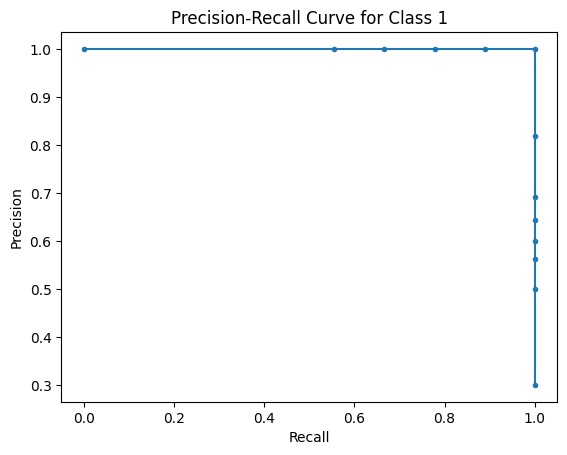

In [22]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt # Import matplotlib for plotting the curve

# load the datasets
iris = load_iris()
x = iris.data
y = iris.target

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Instead of predicting class labels, predict probabilities
# precision_recall_curve works best with prediction probabilities for a specific class
y_scores = rf_classifier.predict_proba(X_test)

# For multiclass classification, you need to plot a precision-recall curve for each class
# treating it as the positive class against all others.
# Let's plot for class 1 as an example. You can repeat this for other classes.
class_to_plot = 1 # Choose the class you want to plot the PR curve for

# Get the true binary labels for the chosen class
y_test_binary = (y_test == class_to_plot)

# Get the probabilities for the chosen class
y_scores_class = y_scores[:, class_to_plot]

# Calculate precision and recall for the chosen class
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_scores_class)

# Print the precision and recall (and optionally thresholds)
print(f"Precision for class {class_to_plot}: {precision}")
print(f"Recall for class {class_to_plot}: {recall}")
# print(f"Thresholds for class {class_to_plot}: {thresholds}") # Thresholds have one less value than precision/recall

# You can also plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for Class {class_to_plot}')
plt.show()

# 44.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [23]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
# load the datasets
iris = load_iris()
x = iris.data
y = iris.target

In [25]:
# split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=200))
]

In [27]:
# Meta-model
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [32]:
stack_model.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
stack_pred = stack_model.predict(X_test)

In [34]:
# campare the accuries of all the model and print the values
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
stack_accuracy = accuracy_score(y_test, stack_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Stacking Classifier Accuracy: {stack_accuracy}")

Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Stacking Classifier Accuracy: 1.0


# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
# load the datasets
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [38]:
# split the train and test model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Values of bootstrap sample sizes (fractions of training data)
sample_fracs = [0.3, 0.5, 0.7, 1.0]

In [40]:
# Store results
results = []

In [44]:
# Train and evaluate
for frac in sample_fracs:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=frac,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((frac, mse))
    print(f"max_samples = {frac:.1f}, MSE = {mse:.4f}")

max_samples = 0.3, MSE = 0.0276
max_samples = 0.5, MSE = 0.0305
max_samples = 0.7, MSE = 0.0321
max_samples = 1.0, MSE = 0.0320
